In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DIR = os.getcwd()
print(DIR)

df_2016 = pd.read_csv(DIR + "/2015to2016contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df_2016.head()

/Users/lukedobrovic/Data/CampaignContributions


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12,15,57) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00465492,FRIENDS OF JOE SESTAK,2013,Q2,201507210200225038,11AI,NaN,1020266,NaN,IND,...,F3,1040720160018595573,t,NaN,2014,SA,NaN,1040720160018595836,http://docquery.fec.gov/cgi-bin/fecimg/?201507...,Contributions From Individuals/Persons Other T...
1,C00575795,HILLARY FOR AMERICA,2016,M10,201701099041150117,17A,C11241249,1137625,NaN,IND,...,F3P,4010920171359608009,t,NaN,2016,SA,NaN,4011120171366214585,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
2,C00465492,FRIENDS OF JOE SESTAK,2013,Q2,201507210200225036,11AI,NaN,1020266,NaN,IND,...,F3,1040720160018595573,t,NaN,2014,SA,NaN,1040720160018595829,http://docquery.fec.gov/cgi-bin/fecimg/?201507...,Contributions From Individuals/Persons Other T...
3,C00575795,HILLARY FOR AMERICA,2016,12G,201701099041274498,17A,C12244496,1137788,NaN,IND,...,F3P,4010920171359608011,t,NaN,2016,SA,NaN,4011120171366556953,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
4,C00179408,MAINE DEMOCRATIC PARTY,2016,M9,201909059163143517,11AI,11AI-000039245,1350680,NaN,IND,...,F3X,4090520191672279180,t,NaN,2016,SA,NaN,4090620191672313017,http://docquery.fec.gov/cgi-bin/fecimg/?201909...,Contributions From Individuals/Persons Other T...


In [2]:
# df.columns
df_2016 = df_2016[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [3]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA"]

df_2016 = df_2016[~df_2016.contributor_employer.str.contains('|'.join(faux))]

df_2016 = df_2016[df_2016["contribution_receipt_amount"] >= 0]  

In [4]:
df_2020 = pd.read_csv(DIR + "/2019to2020contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12,18,20,32,50,51,53,54,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# df.columns
df_2020 = df_2020[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [6]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA"]

df_2020 = df_2020[~df_2020.contributor_employer.str.contains('|'.join(faux))]

df_2020 = df_2020[df_2020["contribution_receipt_amount"] >= 0]  

In [7]:
print("Total 2016 donations: ", df_2016["contribution_receipt_amount"].sum())
print("Total 2020 donations: ", df_2020["contribution_receipt_amount"].sum())

Total 2016 donations:  2150782.11
Total 2020 donations:  2311350.6100000003


In [8]:
df_2016["YEAR"] = "2016"
df_2020["YEAR"] = "2020"

frames1 = [df_2016, df_2020]
df_all = pd.concat(frames1)
df_all.head()

,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation,contributor_first_name,contributor_middle_name,contributor_last_name,YEAR
0,FRIENDS OF JOE SESTAK,2015-04-10,125.0,COLUMBIA UNIVERSITY,PROFESSOR,L,NaN,ERLENMEYER-KIMLING,2016
1,HILLARY FOR AMERICA,2016-09-26,25.0,COLUMBIA UNIVERSITY,PROFESSOR,NAN,NaN,COOPER,2016
2,FRIENDS OF JOE SESTAK,2015-06-10,150.0,COLUMBIA UNIVERSITY,PROFESSOR,L,NaN,ERLENMEYER-KIMLING,2016
3,HILLARY FOR AMERICA,2016-10-03,5.0,COLUMBIA UNIVERSITY,PROFESSOR,BRANKA,NaN,ARSIC,2016
4,MAINE DEMOCRATIC PARTY,2016-08-24,250.0,COLUMBIA UNIVERSITY,STUDENT,NERIA,R.,DOUGLASS,2016


In [9]:
df_all = df_all.groupby(by=["YEAR"]).sum()
df_all

,contribution_receipt_amount
YEAR,
2016,2150782.11
2020,2311350.61


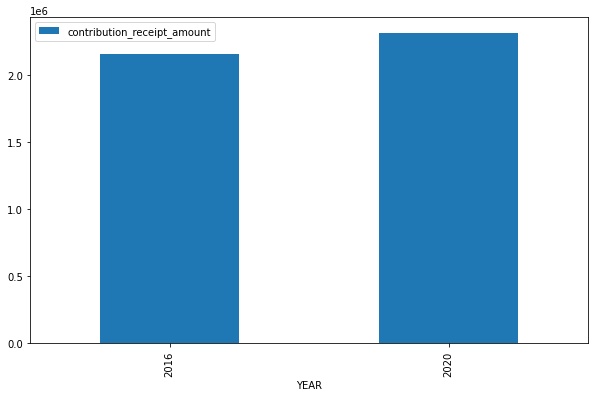

In [10]:
ax0 = df_all.plot(kind="bar",
                 figsize=(10,6))

In [11]:
import datetime
three_weeks = datetime.datetime(2016, 10, 18)

df_b16 = df_2016[df_2016["contribution_receipt_date"] < three_weeks]
df_a16 = df_2016[df_2016["contribution_receipt_date"] >= three_weeks]

In [12]:
t16 = df_2016["contribution_receipt_amount"].sum()
b16 = df_b16["contribution_receipt_amount"].sum()
a16 = df_a16["contribution_receipt_amount"].sum()

b20 = df_2020["contribution_receipt_amount"].sum()
t20 = (b20*t16)/b16
a20 = t20-b20

In [13]:
before = (b16, b20)
after = (a16, a20)
labels = ["2016", "2020"]

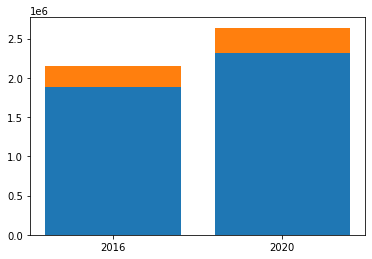

In [20]:
p1 = plt.bar(labels, before)
p2 = plt.bar(labels, after,
             bottom=before)
# plt.yticks(np.arange(6), ["$500k", "$1M", "$1.5M", "$2M", "$2.5M", "$3M"])
# plt.yticks(np.arange(3), ['Tom', 'Dick', 'Sue'])
plt.plot(figsize=(30,30))
plt.savefig('filename.png', dpi=300)

In [16]:
df_occ2016 = df_2016.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])
df_occ2016.index

Int64Index([    0,     1,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            26273, 26312, 26418, 26427, 26535, 26560, 26911, 27018, 27026,
            27027],
           dtype='int64', length=2006)

In [17]:
df_occ2020 = df_2020.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])
df_occ2020.index

Int64Index([    0,     5,     6,     7,     9,    13,    15,    16,    19,
               21,
            ...
            49334, 49335, 49412, 49446, 49447, 49448, 49453, 49504, 49513,
            49544],
           dtype='int64', length=3847)